In [78]:
import os, sys, glob

import numpy as np
import scipy as sp
import healpy as hp
import astropy as ap
import time as ttime
import matplotlib as mpl

from datetime import datetime
from matplotlib import pyplot as plt

In [124]:
import maria 
from maria import tools


import importlib
importlib.reload(maria)
importlib.reload(tools)

<module 'maria.tools' from '/Users/tom/Desktop/repos/maria/maria/tools.py'>

In [125]:
AtLAST_config = {           'site' : 'chajnantor',
                           'bands' : [(27e9, 10e9, 50),   # (band center, bandwidth, dets per band) [GHz, GHz, .]
                                      (39e9, 10e9, 50), 
                                      (93e9, 10e9, 50), 
                                      (145e9, 10e9, 50), 
                                      (225e9, 10e9, 50), 
                                      (280e9, 10e9, 50)],     
                        'geometry' : 'hex',               # [.]   type of detector distribution
                   'field_of_view' : 0.5,                 # [deg] maximum det separation
                    'primary_size' : 50,                  # [m]   size of the primary mirror
                   'band_grouping' : 'randomized',        # [.]   type of band distribution
                       'az_bounds' : [0, 360],            # [.]   type of band distribution
                       'el_bounds' : [20, 90],
                      'max_az_vel' : 3,            
                      'max_el_vel' : 2,
                      'max_az_acc' : 1,
                      'max_el_acc' : 0.25,
                }

daisy_scan_config = {      'start_time' : '2022-07-01T08:00:00',
                             'end_time' : '2022-07-01T08:20:00',
                         'scan_pattern' : 'daisy',      # [.]   the type of scan strategy (SS)
                         'scan_options' : {'k' : 3.1416}, # 
                         'coord_center' : (45, 45),
                          'coord_throw' : (2, 2),
                          'coord_frame' : 'az_el',
                          'scan_period' : 60,        # [s]   how often the scan pattern repeats
                          'sample_rate' : 20,        # [Hz]  how fast to sample
                      }

In [126]:
AtLAST     = maria.Array(AtLAST_config)
daisy_scan = maria.Plan(daisy_scan_config)

In [127]:
lam = maria.LAM(AtLAST, daisy_scan, verbose=True) 

Computing weights: 100%|██████████████████████████| 3/3 [00:00<00:00, 86.65it/s]


 # | depth (m) | beam (m) | beam (') | sim (m) | sim (') | rms (mg/m2) | n_cov | orth | para | h2o (g/m3) | temp (K) | ws (m/s) | wb (deg) |
 1 |     500.0 |    20.00 |   137.51 |    5.00 |   34.38 |      994.91 |    66 |   18 | 1702 |        0.82 |   267.28 |     5.97 |   299.79 |
 2 |    2750.0 |    20.00 |    25.00 |    5.00 |    6.25 |       87.24 |   106 |   50 | 1970 |        0.07 |   256.93 |     8.42 |   352.62 |
 3 |    5000.0 |    20.00 |    13.75 |    5.00 |    3.44 |       50.43 |   152 |   83 | 3257 |        0.05 |   244.85 |    14.17 |   353.81 |


(Text(0.5, 0, 'ra (deg)'), Text(0, 0.5, 'dec (deg)'))

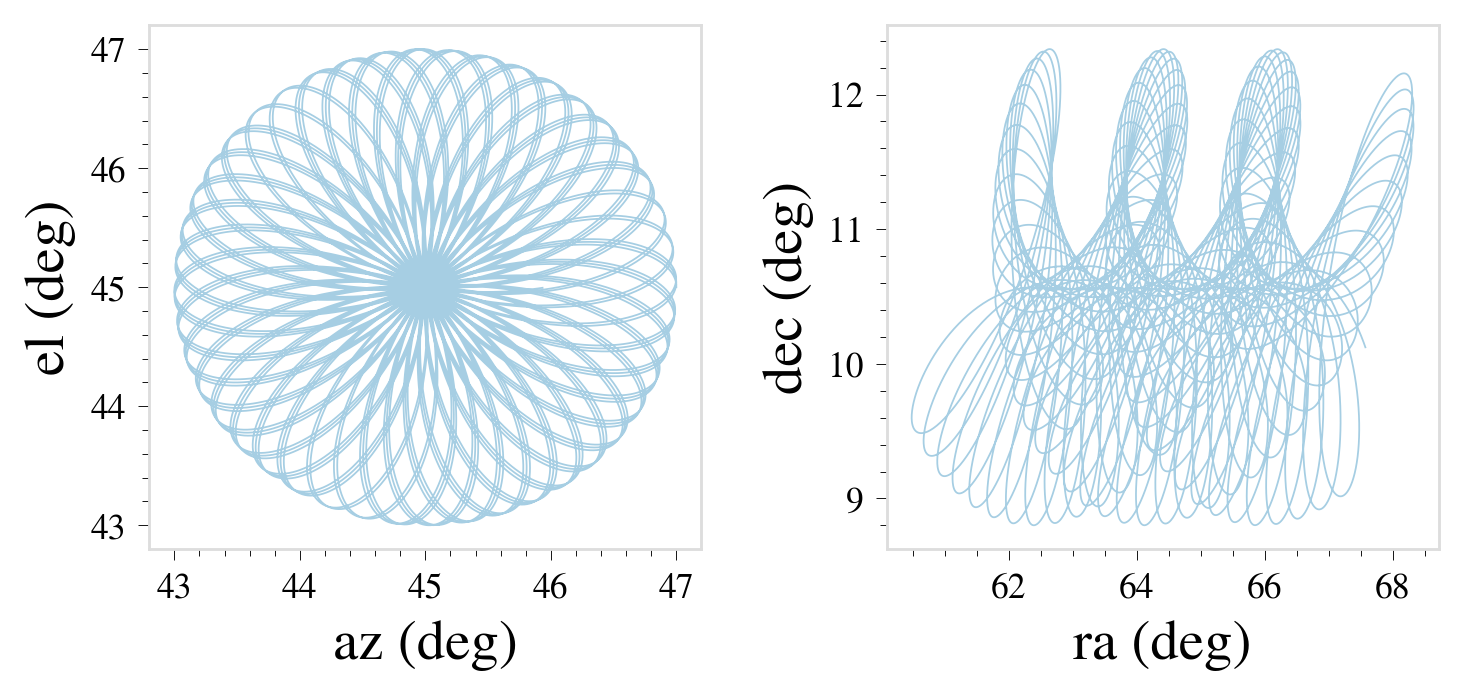

In [102]:
fig, axes = plt.subplots(1,2,figsize=(6,3),dpi=256, tight_layout=True)

axes[0].plot(np.degrees(lam.c_az), np.degrees(lam.c_el), lw=5e-1)
axes[0].set_xlabel('az (deg)'), axes[0].set_ylabel('el (deg)')

axes[1].plot(np.degrees(lam.c_ra), np.degrees(lam.c_dec), lw=5e-1)
axes[1].set_xlabel('ra (deg)'), axes[1].set_ylabel('dec (deg)')

In [103]:
lam.simulate_atmosphere()

Integrating spectra: 100%|████████████████████████| 6/6 [00:01<00:00,  5.58it/s]


In [104]:
f, ps = sp.signal.periodogram(lam.atm_power, fs=lam.plan.sample_rate, window='tukey')

[]

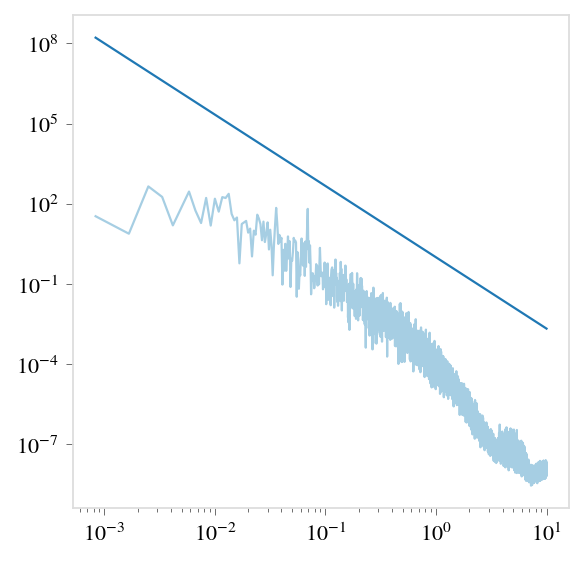

In [105]:
plt.plot(f[1:], ps.mean(axis=0)[1:])
plt.plot(f[1:], f[1:] ** (-8/3))
plt.loglog()

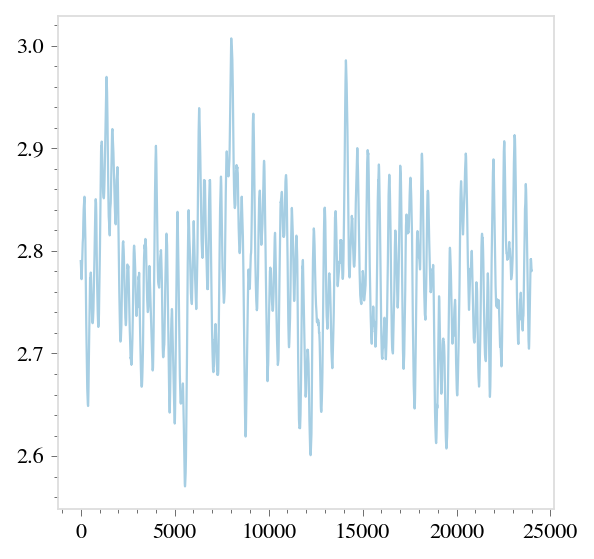

In [109]:
plt.plot(lam.atm_power[0])